# Probabilistic Grapical Models

This notebook will require installation of the new Python modules:

The first is the [Python graphiz module](https://graphviz.readthedocs.io/en/stable/). The module can be installed in standard way using `pip` or `conda`,   but this is a Python interface to [graphviz](https://www.graphviz.org) plotting program __that has  to be installed separately__. Please refer to the [documentation](https://www.graphviz.org/download/) for its installation instructions. 

The second is the [pgmpy](https://pgmpy.org) Python library for working with graphical models (see  [this paper](https://conference.scipy.org/proceedings/scipy2015/pdfs/ankur_ankan.pdf)). 

## Joint probability distribution

In this notebook we will take a more general view of the generative approach we have been following so far.
Please recall that the starting point for generative models is a _joint probability distribution_ for all the random variables considered in the model

$$\newcommand{\b}[1]{\mathbf{#1}}$$
$$P(\b X_1=\b x_1, \ldots, \b X_N=\b x_N)$$

This notation is not strictly speaking correct for the continous variables, but the idea is the same. For the moment, without any loss of generality you can assume that   all variables are  discrete.  

We can distinguish  three separate issues concerning this distribution:

### Representation

First issue is how do we represent this distribution. 
For discrete (and finite) random variables we can in principle just make a big table containig  all possible values of random variables with corresponding probabilities. In practice this only possible for rather small systems. If variable $\b X_i$ has $n_i$ distinct possible values then we need

$$\prod_{i=1}^N n_i - 1 $$

parameters. For _e.g._  ten variables with five values each this already gives  almost ten million parameters

In [1]:
5**10

9765625

Specyfying that number of the parameters by human experts would be clearly impossible. They could be learned, but that would require a large amount of data. 

#### Naive Bayes

But often our model has an internal structure that greatly reduces the number of required parameters. Let's take the Naive Bayes as example. Let's assume that all the variables are conditionally independent conditioned on the variable $\b X_1$. How many parameters we now need? Please try to answer this question by yourself without looking at the answer below.

Under naive Bayes assumptions 

$$
\begin{align}P(\b X_1=\b x_1, \ldots, \b X_N=\b x_N)&=P(\b X_2=\b x_2, \ldots, \b X_N=\b x_N|\b X_1 = \b x_1)P(\b X_1=\b x_1)\\
&=P(\b X_1=\b x_1)\prod_{i=2}^N P(\b X_i=\b x_i|\b X_1=\b x_1)\end{align}
$$

$P(\b X_1=\b x_1)$ requires $n_1-1$ parameters and each $P(\b X_i=\b x_i|\b X_1=\b x_1)$ requires $n_1\times(n_i-1)$ parameters. 

Together this gives 

$$ n_1 \times \left(\sum_{i=2}^N (n_i-1)+1\right) -1 = n_1 \times \left(\sum_{i=2}^N n_i -N+2\right) -1$$

Using the same example of ten variables with five values each we obtain

In [2]:
5*(4*5-10+2)-1

59

A huge  decrease by __five orders__ of magnitude! 

While the naive Bayes is an extreme example, in general every independence relation decreases the number  of parameters needed. As we will see modeling the (in)dependecies between the variables can quite intuitively be done using graphical models.  

### Learning

Once we decide on the representation we have to estimate the parameters of the distributions.  In this notebook we will be less concentrated on learning as on the other two aspects. 

### Inference

Assuming that we have our learned representation of the joint probability distribution function the last problem is the _inference_, that is extracting an useful information out of it. 

#### Probability query

A typical task is a _probability query_: given _evidence_ that is a subset of $m$ variables 

$$\b E=\{\b X_{i_1},\ldots,\b X_{i_m}\}$$

together with an instantiations of each variable 

$$\b e = \{\b x_{i_1},\ldots,\b x_{i_m}\}$$

and $k$  _query variables_ 

$$\b Y=\{\b X_{j_1},\ldots,\b X_{j_k}\}$$

we are asking what is the distribution of $\b Y$ given $\b E$

$$P(\b Y| \b E = \b e)$$ 

If we denote by $\b Z$ the set of variables not in $\b Y$ or $\b E$ then the above distribution can be written as

$$\sum_{\b z} P(\b Y = \b y,\b Z = \b z|\b E = \b e)$$

#### MAP query

Another type is the _MAP query_ (Maximal "a posteriori"). Given the joint probability distribution $P(\b X_1, \ldots,\b X_N)$ and evidence $\b E = \b e$ we are looking for the values of the remaining (non-evidence) variables

$$\b W = \b X \setminus \b E = \{\b X_i:i\neq i_1,\ldots,i_m\}$$

that maximize the probability

$$MAP(\b W| \b e) = \underset{\b w}{\operatorname{arg max}}P(\b W = \b w|\b E = \b e)$$

#### Marginal MAP query

The marginal MAP query is the generalisation of the MAP query to the case when there are some variables $\b Z$ that we want to sum over $\b X =  \b Y \cup \b Z \cup \b E$.

$$MAP(\b Y| \b e) = \underset{\b y}{\operatorname{arg max}}\sum_{\b z} P(\b Y = \b y,\b Z = \b z|\b E = \b e)$$

Please note that running a MAP query is not the same as running several marginal MAP queries as exemplified by the problem below.

#### Problem

Let $X$ and $Y$ be two discrete random variables taking values $0$ and $1$. Give an example of joint probability distribution $P(X=x, Y=y)$ such that

$$(x_m,y_m) = \underset{x,y}{\operatorname{arg max}} P(X=x, Y=y),\quad x_M = \underset{x}{\operatorname{arg max}} \sum_y P(X=x, Y=y)$$

and 

$$x_m\neq x_M$$

$$\begin{array}{c|cc|c}
 & Y=0& Y=1 &\\\hline
X=0 & 0.10 & 0.35& 0.45\\
X=1 & 0.25 & 0.30& 0.55
\end{array}
$$ 

### Gender from height and weight

So consider our standard  sex from height and weight example. The joint probability distribution is  a function of three variables

$$P(h,w,s)$$

Without any loss of information we can represent it as

$$P(h,w,s)= P(h,w|s)P(s)$$

$$P(h,bmi,s)= P(h,bmi|s)P(s)$$

Sex  is a discrete (binary) random variable so  it is characterised by one number: $P(S=female)$. To proceed further we had to make some assumptions on the form of the conditional probability $P(h,w|s)$. We have so far assumed that this is a normal distribution. 

In case of the naive bayes classifier we have additionally assumed that height and BMI are conditionally independent

#### Naive Bayes

$$P(h,bmi|s)= P(h|s)P(bmi|s)$$

Once we have choosen the representation the learning consisted of estimating the parameters of the distributions. 

And finally the inference amounted to calculating probability 

$$P(s=female|\underbrace{h,bmi}_{\text{evidence}})$$

In this case sex was the query variable and height and weight the evidence. In this example we could easilly calculate it directly using the Bayes theorem.

## Graphical models: Bayes Nets

In this very simple example we could manipulate all the formulas directly. For more complicated examples it is useful to use the _graphical notation_. In this notation we represent the joint probability distribution as _directed_ graph.

The nodes represent the random variables and edges the conditional probability distribution. The arrows point from _parent_ nodes to the _child_ nodes. The variable in the child node is conditionally dependent on all variables in the parent nodes. 

So for the sex from height and weight we would have the following rather simple graph

In [3]:
import graphviz

In [4]:
shw = graphviz.Digraph(node_attr = {'shape': 'circle'})
shw.attr('node', fixedsize='true')
shw.node('S')
shw.node('HW','H,W')
shw.edge('S','HW')

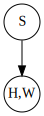

In [5]:
shw

Sometimes it is useful to show the explicit dependence of the $P(h,w|s)$ on the parameters

When considering the inference it is customary to show the evidence by coloring the apropriate  nodes

In [6]:
shw = graphviz.Digraph(node_attr = {'shape': 'circle'})
shw.node('S',)
shw.attr('node', style='filled', fillcolor='#dfdfdf',fixedsize='true')
shw.node('HW','H,W')
shw.edge('S','HW')

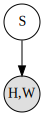

In [7]:
shw

In case of the naive Bayes we have additional independence assumption and the graph looks as follow

In [8]:
shw = graphviz.Digraph(node_attr = {'shape': 'circle'})
shw.node('S',)
shw.attr('node', style='filled', fillcolor='#dfdfdf', fixedsize='true')
shw.node('H','H')
shw.node('W','BMI')
shw.edge('S','H')
shw.edge('S','W')

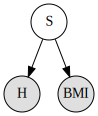

In [9]:
shw

## Monty Hall problem

As another example consider the "famous" [Monty Hall](https://en.wikipedia.org/wiki/Monty_Hall_problem) problem: The host shows you three identical doors, behind one of the doors there is a prize (car). Host  ask you to pick up one of them, but does not open it. Afterwards he pics one of the  two remaining doors and opens it to show that there is no prize behind. Then he let's you switch your choice with the one remaining door. Should you do it? 

The puzzle is simple enough to be solved by considering all the possible cases. Please try to do it without looking at the answer.

 1. With probability 1/3 you have  picked the door with the prize. Both remaining doors lead to empty rooms so the probability that the prize is in the other door is zero.
 2. With probability 2/3 you have  picked the door without the prize. The host opens the second door without the prize so the probability that the prize is in the other door is one.

Combining this together gives us 

$$\frac{1}{3}\times 0 + \frac{2}{3}\times 1 =\frac{2}{3}$$

for the probability that the prize is behind the other door. So we should switch. 

### Using Bayes theorem

We can also solve it in a more systematic way using the Bayes theorem. 

The prize is placed at random behind a door $p$ with probability $P(P=p)=\frac{1}{3}$. Similarly we pick a door $c$ at random with probability $P(C=c)=\frac{1}{3}$ 

$$P(P=p)=\frac{1}{3},\qquad P(C=c)=\frac{1}{3}$$

The host picks  the door $h$ with the conditional probability $P(H=h|P=p, C=c)$ depending on the $p$ and $c$:

$$P(H=h | P=p, C=c)$$

<table style="text-align: center;">
    <tr><td>p</td> <td/> <td colspan=3 align="center">0</td> <td colspan=3 align="center">1</td> <td colspan=3 align="center">2</td></tr>
    <tr style="border-bottom: black thin solid"><td>c</td> <td/> <td style="text-align:center;"> 0 </td> <td> 1 </td> <td> 2 </td> <td> 0 </td> <td> 1 </td> <td> 2 </td> <td> 0 </td> <td> 1 </td> <td> 2 </td> </tr> 
    <tr><td rowspan=3 >h</td> <td style="border-right: black thin solid">0</td> <td> 0   </td> <td> 0 </td> <td> 0 </td> <td> 0 </td> <td> 1/2 </td> <td> 1 </td> <td> 0 </td> <td > 1 </td> <td> 1/2 </td> </tr> 
    <tr>              <td style="border-right: black thin solid">1 </td> <td> 1/2 </td> <td> 0 </td> <td> 1 </td> <td> 0 </td> <td> 0 </td>   <td> 0 </td> <td> 1 </td> <td> 0 </td> <td> 1/2 </td> </tr> 
    <tr>               <td style="border-right: black thin solid">2</td> <td> 1/2 </td> <td> 1 </td> <td> 0 </td> <td> 1 </td> <td> 1/2 </td> <td> 0 </td> <td> 0 </td> <td> 0 </td> <td> 0 </td> </tr> 
</table>

This is implemented in the tables below:

In [10]:
import numpy as np

In [11]:
prob_p = 1/3* np.ones(3)
prob_c = 1/3* np.ones(3)
prob_h_c_p = np.asarray([
    [ [0,0,0],     [0,1/2,1], [0,1/2,1] ],
    [ [1/2, 0, 1], [0,0,0],   [1,0,1/2] ],
    [ [1/2, 1, 0], [1,1/2,0], [0,0, 0] ] ])

What we are interested in is the conditional probability

$$P(P=p|C=c, H=h)$$

This can  can be calculated from the Bayes theorem, again try to do it yourself.|

$$P(P=p|C=c, H=h)= 
\frac{P(H=h|P=p,C=c)P(P=p)P(C=c)}
{\sum\limits_{p=0}^2 P(H=h|P=p,C=c)P(P=p)P(C=c)}$$

So e.g. if $c=1$  and $h=2$

In [12]:
c=1
h=2
num = prob_h_c_p[h,:,c]*prob_c[c]*prob_p
num/num.sum()

array([0.66666667, 0.33333333, 0.        ])

As you can see the probability that the prize is behing door $0$ is 2/3 which is twice as large as the probability that it is behind originally picked door. You can check that this does not depend on which door we have picked at the begining. 

This can be represented by the graphical model:

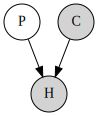

In [13]:
monty_hall = graphviz.Digraph(node_attr = {'shape': 'circle'})
monty_hall.node('P') 
monty_hall.attr('node', style='filled', fillcolor='lightgrey',color='black')
monty_hall.edge('P','H')
monty_hall.edge('C','H')
monty_hall

## Inference in Probabilistic Graphical Models

The examples were simple enough to enable us to get the answers to our queries by using the Bayes theorem directly.  This "brute force" approach requires scanning and/or summing over all the values of variables not fixed by the evidence.  This quickly can become prohibitively expensive in more realistic examples. Again we can exploit the structure of the graphical models for efficient inference. 

The algorithms for doing this are beyond the scope of this lecture. I will only illustrate them with help of the already mentioned [pgmpy](https://pgmpy.org)  library. For example the Monty Hall problems can be formulated and solved in the following fashion

In [14]:
from pgmpy.models import BayesianModel
from pgmpy.factors.discrete import TabularCPD

In [15]:
# Defining the network structure
model = BayesianModel([('C', 'H'), ('P', 'H')])

# Defining the CPDs:
cpd_c = TabularCPD('C', 3, [[0.33], [0.33], [0.33]])
cpd_p = TabularCPD('P', 3, [[0.33], [0.33], [0.33]])
cpd_h = TabularCPD('H', 3, [[0, 0, 0, 0, 0.5, 1, 0, 1, 0.5], 
                            [0.5, 0, 1, 0, 0, 0, 1, 0, 0.5], 
                            [0.5, 1, 0, 1, 0.5, 0, 0, 0, 0]],
                  evidence=['C', 'P'], evidence_card=[3, 3])

# Associating the CPDs with the network structure.
model.add_cpds(cpd_c, cpd_p, cpd_h)
model.check_model()


True

Once we have model we can run queries on it

In [16]:
from pgmpy.inference import VariableElimination

`VariableElimination` is one of the many inference algorithm implemented in the `pgmpy`  module. The method `query` performs the probability query

In [17]:
infer = VariableElimination(model)
posterior_p = infer.query(['P'], evidence={'C': 1, 'H': 2})
print(posterior_p)

0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

+------+----------+
| P    |   phi(P) |
+======+==========+
| P(0) |   0.6667 |
+------+----------+
| P(1) |   0.3333 |
+------+----------+
| P(2) |   0.0000 |
+------+----------+


We see that we get same answer as before: we should switch the door. 

If we are only interested in the door with the highest probability of containing the prize we can execute a MAP query

In [18]:
infer.map_query(['P'], evidence={'C': 1, 'H': 2})

0it [00:00, ?it/s]

Finding Elimination Order: : : 0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

{'P': 0}

## Student example

Now we will consider a more elaborate example taken from the textbook "Probabilistic Graphical Models, Principles and Techniques" by D. Koller and N. Friedman. 

"Consider the problem
faced by a company trying to hire a recent college graduate. The company’s goal is to hire
intelligent employees, but there is no way to test intelligence directly. However, the company
has access to the student’s SAT scores, which are informative but not fully indicative." 

"Elaborating our example, we now assume that the company also has access to the student’s
grade G in some course."

"The student’s grade, in this case, depends not only on his intelligence but also on the difficulty of
the course, represented by a random variable D whose domain is Val(D) = {easy; hard}. Our
student asks his professor for a recommendation letter. The professor is absentminded and never
remembers the names of her students. She can only look at his grade, and she writes her letter
for him based on that information alone. The quality of her letter is a random variable L, whose
domain is Val(L) = {strong; weak}. The actual quality of the letter depends stochastically on
the grade. (It can vary depending on how stressed the professor is and the quality of the coffee
she had that morning.)"

__Problem__

Please draw the graph representing this information.

In [19]:
student_gr = graphviz.Digraph(node_attr={'shape' : 'oval'})
student_gr.node('D', 'Difficulty (2)')
student_gr.node('I', 'Intelligence (2)')
student_gr.node('S','Sat (2)')
student_gr.node('G', 'Grade (3)')
student_gr.edges(['DG','IG'])
student_gr.node('L','Letter (2)')
student_gr.edges(['IS','GL'])

Finding Elimination Order: : : 0it [00:00, ?it/s]


Finding Elimination Order: : : 0it [00:00, ?it/s]

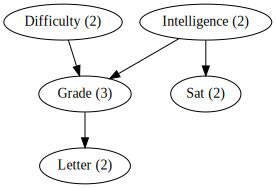

In [20]:
student_gr

This graph implies the following factorisation of the joint probability distribution function (please try to write it down yourself): 

$$P(D,I,G,S,L)=P(L|G)\cdot P(G|D,I)\cdot P(S|I)\cdot P(I)\cdot P(D)$$

#### Problem

How many parameters are needed in this model? How many would be needed in full joint probability distribution?

Taking into acount that all  distribution are normalized we have 

In [21]:
1+1 + 4*2 + 3 + 2

15

parameters

Full distribution would require 

In [22]:
2*2*3*2*2

48

parameters. More then thrice that many. 

Let's set asside the question "how" and just assume that we know all the probability distributions in the graph 

<table>
    <tr><th colspan=2>Inteligence</th> <th colspan=2> Difficulty</th></tr>
    <tr><td> medium</td> <td>0.7</td> <td> low </td>  <td>0.6</td></tr>
    <tr><td> high  </td> <td>0.3</td> <td> high </td> <td>0.4</td></tr>
</table>    

<div style="width:80%; ">
<table style="display: inline-block; margin-right: 20px; margin-left:100px; vertical-align:text-top;">
    <tr><th>Grade</th> <th colspan=4>Inteligence,Difficulty</th></tr>
    <tr><td/> <td>medium,low</td> <td>medium,high</td><td>high,low</td><td>high,high</td></tr>
    <tr><td>A</td> <td>0.3</td> <td>0.05</td> <td>0.9</td> <td>0.5</td> </tr>
    <tr><td>B</td> <td>0.4</td> <td>0.25</td> <td>0.08</td> <td>0.3</td></tr>
    <tr><td>C</td> <td>0.3</td> <td>0.7</td> <td>0.02</td> <td>0.2</td></tr>
</table>    

<table style="display: inline-block; margin-right: 20px; vertical-align:text-top;">
    <tr><th>Letter</th><th colspan=3> Grade </th></tr>
    <tr><td/> <td>A</td> <td>B</td> <td>C</td></tr>
    <tr><td>weak</td><td>0.1</td><td>0.4</td><td>0.99</td></tr>
     <tr><td>strong</td><td>0.9</td><td>0.6</td><td>0.01</td></tr>
</table>

<table style="display: inline-block; margin-right: auto; vertical-align:text-top;">
    <tr><th>SAT </th><th colspan=2> Intelligence </th></tr>
    <tr><td/> <td>medium</td> <td>high</td> </tr>
    <tr><td>low</td><td>0.95</td><td>0.2</td></tr>
     <tr><td>high</td><td>0.05</td><td>0.8</td></tr>
</table>    
    
</div>

We can translate this into the `pgmpy` model

In [23]:
# Defining the network structure
student = BayesianModel([('D', 'G'), ('I', 'G'),('I','S'),('G','L')])

# Defining the CPDs:
cpd_I = TabularCPD('I', 2, [[0.7],
                            [0.3]])
cpd_D = TabularCPD('D', 2, [[0.6], 
                            [0.4]])

cpd_G = TabularCPD('G', 3, [[0.3, 0.05, 0.9, 0.5], 
                            [0.4, 0.25, 0.08, 0.3], 
                            [0.3, 0.7, 0.02, 0.2]],
                  evidence=['I', 'D'], evidence_card=[2, 2])
cpd_L = TabularCPD('L',2,[[0.1, 0.4, 0.99],
                         [0.9, 0.6, 0.01]], evidence=['G'], evidence_card=[3])

cpd_S = TabularCPD('S',2,[[0.95, 0.2],
                          [0.05, 0.8]], evidence=['I'], evidence_card=[2])

# Associating the CPDs with the network structure.
student.add_cpds(cpd_I, cpd_D, cpd_G, cpd_L, cpd_S)

student.check_model()

True

Having specified the model we can use it for inference

In [24]:
student_infer = VariableElimination(student)

What is posterior probability for students high intelligence knowing that he scored high on SAT test?

From Bayes theorem

$$P(I=i|SAT=s)=\frac{P(SAT=s|I=i)P(I=i)}{\sum_{i'} P(SAT=s|I=i')P(I=i')}$$

In [25]:
0.8*0.3/(0.8*0.3+0.05*0.7)

0.8727272727272728

And we get same answer querring our model

In [26]:
posterior_p = student_infer.query(['I'], evidence={'S': 1})
print(posterior_p)

  0%|          | 0/3 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Eliminating: G:   0%|          | 0/3 [00:00<?, ?it/s]

Eliminating: L:   0%|          | 0/3 [00:00<?, ?it/s]

Eliminating: D:   0%|          | 0/3 [00:00<?, ?it/s]

Eliminating: D: 100%|██████████| 3/3 [00:00<00:00, 637.08it/s]

+------+----------+
| I    |   phi(I) |
+======+==========+
| I(0) |   0.1273 |
+------+----------+
| I(1) |   0.8727 |
+------+----------+


What is the probability of high intelligence given that she received a strong  letter of recomendation? 

In [27]:
posterior_p = student_infer.query(['I'], evidence={'L': 1})
print(posterior_p)

  0%|          | 0/3 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Eliminating: S:   0%|          | 0/3 [00:00<?, ?it/s]

Eliminating: G:   0%|          | 0/3 [00:00<?, ?it/s]

Eliminating: D:   0%|          | 0/3 [00:00<?, ?it/s]

Eliminating: D: 100%|██████████| 3/3 [00:00<00:00, 573.36it/s]

+------+----------+
| I    |   phi(I) |
+======+==========+
| I(0) |   0.5415 |
+------+----------+
| I(1) |   0.4585 |
+------+----------+


and both?

In [28]:
posterior_p = student_infer.query(['I'], evidence={'L': 1, 'S':1})

Finding Elimination Order: : 100%|██████████| 3/3 [00:00<00:00, 76.93it/s]


Finding Elimination Order: : 100%|██████████| 3/3 [00:00<00:00, 152.38it/s]


  0%|          | 0/2 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

Eliminating: G:   0%|          | 0/2 [00:00<?, ?it/s]

Eliminating: D:   0%|          | 0/2 [00:00<?, ?it/s]

Eliminating: D: 100%|██████████| 2/2 [00:00<00:00, 637.97it/s]

In [29]:
print(posterior_p)

+------+----------+
| I    |   phi(I) |
+======+==========+
| I(0) |   0.0687 |
+------+----------+
| I(1) |   0.9313 |
+------+----------+


And what if we know that the course was diffcult?

In [30]:
posterior_p = student_infer.query(['I'], evidence={'L': 1, 'S':1, 'D' :1})

  0%|          | 0/1 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Eliminating: G:   0%|          | 0/1 [00:00<?, ?it/s]

Eliminating: G: 100%|██████████| 1/1 [00:00<00:00, 647.17it/s]

In [31]:
print(posterior_p)

+------+----------+
| I    |   phi(I) |
+======+==========+
| I(0) |   0.0445 |
+------+----------+
| I(1) |   0.9555 |
+------+----------+


And what we can say about the difficulty of the course given that student had high SAT score and weak recomendation letter ?

In [32]:
posterior_p = student_infer.query(['D'], evidence={'L': 0, 'S':1})

  0%|          | 0/2 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

Eliminating: G:   0%|          | 0/2 [00:00<?, ?it/s]

Eliminating: I:   0%|          | 0/2 [00:00<?, ?it/s]

Eliminating: I: 100%|██████████| 2/2 [00:00<00:00, 606.99it/s]

In [33]:
print(posterior_p)

+------+----------+
| D    |   phi(D) |
+======+==========+
| D(0) |   0.3972 |
+------+----------+
| D(1) |   0.6028 |
+------+----------+


and what we can say  jointly about student inteligence and diffculty of the class knowing he received strong recomendation letter? 

In [34]:
posterior_p = student_infer.query(['I','D'], evidence={'L': 1}, joint=True)

Finding Elimination Order: : 100%|██████████| 2/2 [00:00<00:00, 31.90it/s]


Finding Elimination Order: : 100%|██████████| 1/1 [00:00<00:00, 23.49it/s]


Finding Elimination Order: : 100%|██████████| 2/2 [00:00<00:00, 89.83it/s]


  0%|          | 0/2 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

Eliminating: S:   0%|          | 0/2 [00:00<?, ?it/s]

Eliminating: G:   0%|          | 0/2 [00:00<?, ?it/s]

Eliminating: G: 100%|██████████| 2/2 [00:00<00:00, 597.39it/s]

In [35]:
print(posterior_p)

+------+------+------------+
| I    | D    |   phi(I,D) |
+======+======+============+
| I(0) | D(0) |     0.4289 |
+------+------+------------+
| I(0) | D(1) |     0.1126 |
+------+------+------------+
| I(1) | D(0) |     0.3075 |
+------+------+------------+
| I(1) | D(1) |     0.1510 |
+------+------+------------+


In [36]:
posterior_p = student_infer.query(['I','D'], evidence={'L': 1}, joint=False)

  0%|          | 0/2 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

Eliminating: S:   0%|          | 0/2 [00:00<?, ?it/s]

Eliminating: G:   0%|          | 0/2 [00:00<?, ?it/s]

Eliminating: G: 100%|██████████| 2/2 [00:00<00:00, 745.39it/s]

In [37]:
print(posterior_p['I'])
print(posterior_p['D'])

+------+----------+
| I    |   phi(I) |
+======+==========+
| I(0) |   0.5415 |
+------+----------+
| I(1) |   0.4585 |
+------+----------+
+------+----------+
| D    |   phi(D) |
+======+==========+
| D(0) |   0.7364 |
+------+----------+
| D(1) |   0.2636 |
+------+----------+


In [38]:
posterior_p = student_infer.query(['I','D'], evidence={'L': 0}, joint=True)

  0%|          | 0/2 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

Eliminating: S:   0%|          | 0/2 [00:00<?, ?it/s]

Eliminating: G:   0%|          | 0/2 [00:00<?, ?it/s]

Eliminating: G: 100%|██████████| 2/2 [00:00<00:00, 718.45it/s]

In [39]:
print(posterior_p)

+------+------+------------+
| D    | I    |   phi(D,I) |
+======+======+============+
| D(0) | I(0) |     0.4110 |
+------+------+------------+
| D(0) | I(1) |     0.0513 |
+------+------+------------+
| D(1) | I(0) |     0.4490 |
+------+------+------------+
| D(1) | I(1) |     0.0887 |
+------+------+------------+


This list could go on, and on but I hope you have a feeling how those models can be used. 

### Learning

So far we have assumed that all the probability distributions in the graph are known. In reality those are the parameters of the model and estimating them is the crucial part of the modeling process. One possibility is to estimate them based on the experts input. This was the original idea behind the expert systems. Unfortunatelly people in general are not  very good in estimating the probabilities. And also even with the reduction provided by the structured graph models the number of parameters is just to big to be estimated by human experts.  

It is nowadays much more realistic to learn those parameters, as in all other models considered so far. As I don't have any real data for this fake example I will generate it using functionality built in the `pgmpy` library. 

In [40]:
from pgmpy.sampling.Sampling import GibbsSampling, BayesianModelSampling

Finding Elimination Order: : 100%|██████████| 2/2 [00:00<00:00, 32.28it/s]


Finding Elimination Order: : 100%|██████████| 2/2 [00:00<00:00, 48.36it/s]


Finding Elimination Order: : 100%|██████████| 2/2 [00:00<00:00, 95.31it/s]

In [41]:
gibbs = GibbsSampling(student)

In [42]:
data = gibbs.sample(size=300)

  0%|          | 0/299 [00:00<?, ?it/s]

100%|██████████| 299/299 [00:00<00:00, 4925.56it/s]

In [43]:
data.head(3)

,D,G,I,S,L
0,0,0,1,0,1
1,0,0,0,0,1
2,0,0,1,1,1


In [44]:
data.mean()

D    0.400000
G    0.896667
I    0.343333
S    0.306667
L    0.570000
dtype: float64

Now I will define a new clean ("tabula rasa") model:

In [45]:
student_tr = BayesianModel([('D', 'G'), ('I', 'G'),('I','S'),('G','L')])

In [46]:
student_tr.get_cpds()

[]

And estimate the parameters using the `fit` method. 

In [47]:
student_tr.fit(data)

In [48]:
cpds = student_tr.get_cpds()

In [49]:
print(cpds[0])

+------+-----+
| D(0) | 0.6 |
+------+-----+
| D(1) | 0.4 |
+------+-----+


In [50]:
print(cpds[1])

+------+---------------------+----------------------+----------------------+---------------------+
| D    | D(0)                | D(0)                 | D(1)                 | D(1)                |
+------+---------------------+----------------------+----------------------+---------------------+
| I    | I(0)                | I(1)                 | I(0)                 | I(1)                |
+------+---------------------+----------------------+----------------------+---------------------+
| G(0) | 0.35714285714285715 | 0.9558823529411765   | 0.011764705882352941 | 0.6285714285714286  |
+------+---------------------+----------------------+----------------------+---------------------+
| G(1) | 0.39285714285714285 | 0.029411764705882353 | 0.25882352941176473  | 0.2                 |
+------+---------------------+----------------------+----------------------+---------------------+
| G(2) | 0.25                | 0.014705882352941176 | 0.7294117647058823   | 0.17142857142857143 |
+------+--

This should be compared with the original distributions

In [51]:
print(student.get_cpds(node='G'))

+------+------+------+------+------+
| I    | I(0) | I(0) | I(1) | I(1) |
+------+------+------+------+------+
| D    | D(0) | D(1) | D(0) | D(1) |
+------+------+------+------+------+
| G(0) | 0.3  | 0.05 | 0.9  | 0.5  |
+------+------+------+------+------+
| G(1) | 0.4  | 0.25 | 0.08 | 0.3  |
+------+------+------+------+------+
| G(2) | 0.3  | 0.7  | 0.02 | 0.2  |
+------+------+------+------+------+


But probably a better idea is to ask some queries and compare the answer with original

In [52]:
student_tr_infer = VariableElimination(student_tr)
posterior_tr_p = student_tr_infer.query(['I'],  evidence={'L': 1,})

  0%|          | 0/3 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Eliminating: S:   0%|          | 0/3 [00:00<?, ?it/s]

Eliminating: G:   0%|          | 0/3 [00:00<?, ?it/s]

Eliminating: D:   0%|          | 0/3 [00:00<?, ?it/s]

Eliminating: D: 100%|██████████| 3/3 [00:00<00:00, 700.41it/s]

In [53]:
print(posterior_tr_p)

+------+----------+
| I    |   phi(I) |
+======+==========+
| I(0) |   0.5111 |
+------+----------+
| I(1) |   0.4889 |
+------+----------+


Here is the same query on the original model

In [54]:
posterior_p = student_infer.query(['I'],  evidence={'L': 1,})

Finding Elimination Order: : 100%|██████████| 3/3 [00:00<00:00, 150.28it/s]


  0%|          | 0/3 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Eliminating: S:   0%|          | 0/3 [00:00<?, ?it/s]

Eliminating: G:   0%|          | 0/3 [00:00<?, ?it/s]

Eliminating: D:   0%|          | 0/3 [00:00<?, ?it/s]

Eliminating: D: 100%|██████████| 3/3 [00:00<00:00, 718.90it/s]

In [55]:
print(posterior_p)

+------+----------+
| I    |   phi(I) |
+======+==========+
| I(0) |   0.5415 |
+------+----------+
| I(1) |   0.4585 |
+------+----------+


Results (at least in my realisation) look very good. Let's try to estimate the error on those number. To this end, we will  repeat same procedure 20 times, each time with new data

In [56]:
n_samples = 300
results = []
for i in range(20):
    data = gibbs.sample(size=n_samples)
    student_tr = BayesianModel([('D', 'G'), ('I', 'G'),('I','S'),('G','L')])
    student_tr.fit(data)
    student_tr_infer = VariableElimination(student_tr)
    posterior_p = student_tr_infer.query(['I'], evidence={'L': 1},show_progress=False)
    results.append(posterior_p.values)    
dist = np.stack(results, axis=0)    

  0%|          | 0/299 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|██████████| 3/3 [00:00<00:00, 99.82it/s]


100%|██████████| 299/299 [00:00<00:00, 4917.76it/s]


  0%|          | 0/299 [00:00<?, ?it/s]

100%|██████████| 299/299 [00:00<00:00, 5603.75it/s]

  0%|          | 0/299 [00:00<?, ?it/s]

100%|██████████| 299/299 [00:00<00:00, 5293.36it/s]


  0%|          | 0/299 [00:00<?, ?it/s]

100%|██████████| 299/299 [00:00<00:00, 5220.79it/s]


  0%|          | 0/299 [00:00<?, ?it/s]

100%|██████████| 299/299 [00:00<00:00, 5279.90it/s]


  0%|          | 0/299 [00:00<?, ?it/s]

100%|██████████| 299/299 [00:00<00:00, 5353.90it/s]


  0%|          | 0/299 [00:00<?, ?it/s]

100%|██████████| 299/299 [00:00<00:00, 5565.68it/s]


  0%|          | 0/299 [00:00<?, ?it/s]

100%|██████████| 299/299 [00:00<00:00, 4932.20it/s]


  0%|          | 0/299 [00:00<?, ?it/s]

100%|██████████| 299/299 [00:00<00:00, 5197.49it/s]


  0%|          | 0/299 [00:00<?, ?it/s]

100%|██████████| 299/299 [00:00<00:00, 5708.07it/s]


  0%|          | 0/299 [00:00<?, ?it/s]

100%|██████████| 299/299 [00:00<00:00, 5675.13it/s]


  0%|          | 0/299 [00:00<?, ?it/s]

100%|██████████| 299/299 [00:00<00:00, 5545.25it/s]


  0%|          | 0/299 [00:00<?, ?it/s]

100%|██████████| 299/299 [00:00<00:00, 5665.14it/s]


  0%|          | 0/299 [00:00<?, ?it/s]

100%|██████████| 299/299 [00:00<00:00, 5427.58it/s]


  0%|          | 0/299 [00:00<?, ?it/s]

100%|██████████| 299/299 [00:00<00:00, 5560.22it/s]


  0%|          | 0/299 [00:00<?, ?it/s]

100%|██████████| 299/299 [00:00<00:00, 5241.04it/s]


  0%|          | 0/299 [00:00<?, ?it/s]

100%|██████████| 299/299 [00:00<00:00, 5298.70it/s]


  0%|          | 0/299 [00:00<?, ?it/s]

100%|██████████| 299/299 [00:00<00:00, 5501.68it/s]


  0%|          | 0/299 [00:00<?, ?it/s]

100%|██████████| 299/299 [00:00<00:00, 5504.43it/s]


  0%|          | 0/299 [00:00<?, ?it/s]

100%|██████████| 299/299 [00:00<00:00, 5433.51it/s]

The mean value is close to original

In [57]:
dist.mean(axis=0)

array([0.52010698, 0.47989302])

but the errors 

In [58]:
dist.std(axis=0)

array([0.07414637, 0.07414637])

are big enough to switch the maximum estimate (MAP) from I(0) to I(1)

In [59]:
map_results=[]
for i in range(20):
    data = gibbs.sample(size=n_samples)
    student_tr = BayesianModel([('D', 'G'), ('I', 'G'),('I','S'),('G','L')])
    student_tr.fit(data)
    student_tr_infer = VariableElimination(student_tr)
    map_q = student_tr_infer.map_query(['I'], evidence={'L': 1},show_progress=False)
    map_results.append(map_q['I'])    
max_I = np.asarray(map_results)

  0%|          | 0/299 [00:00<?, ?it/s]

100%|██████████| 299/299 [00:00<00:00, 4806.68it/s]


  0%|          | 0/299 [00:00<?, ?it/s]

100%|██████████| 299/299 [00:00<00:00, 5658.49it/s]


  0%|          | 0/299 [00:00<?, ?it/s]

100%|██████████| 299/299 [00:00<00:00, 5567.23it/s]


  0%|          | 0/299 [00:00<?, ?it/s]

100%|██████████| 299/299 [00:00<00:00, 4934.71it/s]


  0%|          | 0/299 [00:00<?, ?it/s]

100%|██████████| 299/299 [00:00<00:00, 5618.08it/s]


  0%|          | 0/299 [00:00<?, ?it/s]

100%|██████████| 299/299 [00:00<00:00, 5524.27it/s]


  0%|          | 0/299 [00:00<?, ?it/s]

100%|██████████| 299/299 [00:00<00:00, 5128.71it/s]


  0%|          | 0/299 [00:00<?, ?it/s]

100%|██████████| 299/299 [00:00<00:00, 5572.35it/s]


  0%|          | 0/299 [00:00<?, ?it/s]

100%|██████████| 299/299 [00:00<00:00, 5829.24it/s]


  0%|          | 0/299 [00:00<?, ?it/s]

100%|██████████| 299/299 [00:00<00:00, 5597.07it/s]


  0%|          | 0/299 [00:00<?, ?it/s]

100%|██████████| 299/299 [00:00<00:00, 5570.64it/s]


  0%|          | 0/299 [00:00<?, ?it/s]

100%|██████████| 299/299 [00:00<00:00, 5819.15it/s]


  0%|          | 0/299 [00:00<?, ?it/s]

100%|██████████| 299/299 [00:00<00:00, 5848.08it/s]


  0%|          | 0/299 [00:00<?, ?it/s]

100%|██████████| 299/299 [00:00<00:00, 5886.65it/s]


  0%|          | 0/299 [00:00<?, ?it/s]

100%|██████████| 299/299 [00:00<00:00, 5672.57it/s]


  0%|          | 0/299 [00:00<?, ?it/s]

100%|██████████| 299/299 [00:00<00:00, 6003.39it/s]


  0%|          | 0/299 [00:00<?, ?it/s]

100%|██████████| 299/299 [00:00<00:00, 5999.57it/s]


  0%|          | 0/299 [00:00<?, ?it/s]

100%|██████████| 299/299 [00:00<00:00, 5566.42it/s]


  0%|          | 0/299 [00:00<?, ?it/s]

100%|██████████| 299/299 [00:00<00:00, 5523.54it/s]


  0%|          | 0/299 [00:00<?, ?it/s]

100%|██████████| 299/299 [00:00<00:00, 5326.07it/s]

In [60]:
max_I.mean()

0.3

So once in a while we get the wrong answer: the probability that student is highly inteligent is higher then medium inteligent in oposition to the original model.  While this examples implies caution while interpreting the model inference, we should be aware that in case of so small difference between the probabilities we should probably treat them as equal anyway.

## Conditional independence and d-separability

I will now briefly discuss what additional information can be extracted from the graphs.

__1.__

Consider the  difficulty of the course and the recomendation letter. Those two random variables are cleary correlated. If the course is more difficult, then the probability of lower grade is higher and hence the probability of strong letter is lower. Formaly we can calculate

$$P(L=l,D=d)=\sum_{g,i} P(L=l|G=g)P(G=g|I=i,D=d)P(I=i)P(D=d)$$

In general this will not be equal to 

$$P(L=l)\cdot P(D=d)=P(D=d)\sum_{g,i,d'} P(L=l|G=g)P(G=g|I=i,D=d')P(D=d')P(I=i)$$

but you can check it by  explicit substitution of the probability values from the tables above or using the pgmpy library

In [61]:
p_ld = student_infer.query(['L','D']) 

  0%|          | 0/3 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Eliminating: S:   0%|          | 0/3 [00:00<?, ?it/s]

Eliminating: I:   0%|          | 0/3 [00:00<?, ?it/s]

Eliminating: G:   0%|          | 0/3 [00:00<?, ?it/s]

Eliminating: G: 100%|██████████| 3/3 [00:00<00:00, 488.66it/s]

In [62]:
print(p_ld)

+------+------+------------+
| D    | L    |   phi(D,L) |
+======+======+============+
| D(0) | L(0) |     0.2301 |
+------+------+------------+
| D(0) | L(1) |     0.3699 |
+------+------+------------+
| D(1) | L(0) |     0.2676 |
+------+------+------------+
| D(1) | L(1) |     0.1324 |
+------+------+------------+


In [63]:
p_l = student_infer.query(['L'])
p_d = student_infer.query(['D'])

  0%|          | 0/4 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: S:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: I:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: G:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: D:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: D: 100%|██████████| 4/4 [00:00<00:00, 630.63it/s]


Finding Elimination Order: : 100%|██████████| 3/3 [00:00<00:00, 85.14it/s]


Finding Elimination Order: : 100%|██████████| 4/4 [00:00<00:00, 325.02it/s]


  0%|          | 0/4 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: S:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: I:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: G:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: L:   0%|          | 0/4 [00:00<?, ?it/s]

Eliminating: L: 100%|██████████| 4/4 [00:00<00:00, 643.94it/s]

In [64]:
print(p_d.product(p_l, inplace=False))

+------+------+------------+
| D    | L    |   phi(D,L) |
+======+======+============+
| D(0) | L(0) |     0.2986 |
+------+------+------------+
| D(0) | L(1) |     0.3014 |
+------+------+------------+
| D(1) | L(0) |     0.1991 |
+------+------+------------+
| D(1) | L(1) |     0.2009 |
+------+------+------------+


But let' suppose that we know the grade, then 

$$P(L=l,D=d|G=g)=\frac{\sum_{i} P(L=l|G=g)P(G=g|I=i,D=d)P(I=i)P(D=d)}{P(G=g)}$$

and

$$P(L=l|G=g)\cdot P(D=d|G=g)
=P(L=l|G=g)\frac{\sum_i P(G=g|D=d,I=i)P(I=i)P(D=d)}{\sum_{i,d} P(G=g|D=d,I=i)P(I=i)P(D=d)}
=P(L=l|G=g)\frac{\sum_i P(G=g|D=d,I=i)P(I=i)P(D=d)}{P(G=g)}
$$

Both expressions are the same, so variables $L$ nad $D$ when conditioned on $G$ are conditionally independent. Again this is intuitively clear: the letter by assumption depeds only on the grade. Once grade is fixed there is no more dependence on any other variable. We can check this explicitely using pgmpy

In [65]:
p_ld_g = student_infer.query(['L','D'], evidence={'G':0})
p_d_g = student_infer.query(['D'], evidence={'G':0})
p_l_g = student_infer.query(['L'], evidence={'G':0})

  0%|          | 0/2 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

Eliminating: S:   0%|          | 0/2 [00:00<?, ?it/s]

Eliminating: I:   0%|          | 0/2 [00:00<?, ?it/s]

Eliminating: I: 100%|██████████| 2/2 [00:00<00:00, 656.80it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Eliminating: S:   0%|          | 0/3 [00:00<?, ?it/s]

Eliminating: I:   0%|          | 0/3 [00:00<?, ?it/s]

Eliminating: L:   0%|          | 0/3 [00:00<?, ?it/s]

Eliminating: L: 100%|██████████| 3/3 [00:00<00:00, 662.68it/s]


Finding Elimination Order: : 100%|██████████| 4/4 [00:00<00:00, 84.94it/s]


Finding Elimination Order: : 100%|██████████| 2/2 [00:00<00:00, 87.64it/s]


Finding Elimination Order: : 100%|██████████| 3/3 [00:00<00:00, 242.08it/s]


  0%|          | 0/3 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Eliminating: S:   0%|          | 0/3 [00:00<?, ?it/s]

Eliminating: I:   0%|          | 0/3 [00:00<?, ?it/s]

Eliminating: D:   0%|          | 0/3 [00:00<?, ?it/s]

Eliminating: D: 100%|██████████| 3/3 [00:00<00:00, 696.73it/s]

In [66]:
print(p_ld_g)

+------+------+------------+
| D    | L    |   phi(D,L) |
+======+======+============+
| D(0) | L(0) |     0.0796 |
+------+------+------------+
| D(0) | L(1) |     0.7160 |
+------+------+------------+
| D(1) | L(0) |     0.0204 |
+------+------+------------+
| D(1) | L(1) |     0.1840 |
+------+------+------------+


In [67]:
print(p_d_g.product(p_l_g, inplace=False) ) 

+------+------+------------+
| D    | L    |   phi(D,L) |
+======+======+============+
| D(0) | L(0) |     0.0796 |
+------+------+------------+
| D(0) | L(1) |     0.7160 |
+------+------+------------+
| D(1) | L(0) |     0.0204 |
+------+------+------------+
| D(1) | L(1) |     0.1840 |
+------+------+------------+


__2.__ 

Now look at the grade $G$  and SAT score $S$. Both variables are  dependent: they both depend on inteligence. E.g. once we know that the SAT score is high the probability of high inteligence goes up and so does the probability of the high grade:

$$P(G=g,S=s)=\sum_i P(G=g|I=i)P(S=s|I=i)P(I=i)$$ 

which in general will not factorise into:

$$P(G=g)P(S=s)=\sum_i P(G=g|I=i)P(i)\sum_{i'}P(S=s|I=i')P(I=i')$$ 

But if we fix the intelligence e.g. by measuring it separately then

$$P(G=g,S=s|I=i)=\frac{P(G=g|I=i)P(S=s|I=i)P(I=i)}{P(I=i)} = P(G=g|I=i)P(S=s|I=i)$$ 

and again we found that the variables are conditionally independent. 

__3.__ 

Finally let's consider variables $I$ and $D$. Those variables are independent by definition. But supose that we know the grade. If we know that that grade is high and the intelligence is medium than we are more likely  assume that the course was not difficult. This is known as _explaning away_: The high grade is explained away by the low difficulty of the course. 

So by fixing the grade we have introduced the correlation betwee two independent variables:

$$P(I=i,D=d|G=g)= P(G=g|I=i, D=d)P(I=i)P(D=d)$$

which in general will not be equal to


$$P(I=i|G=g)P(D=d|G=g)= \frac{\sum_{d'} P(G=g|I=i, D=d)P(I=i)P(D=d)}{P(G=g)}\frac{\sum_{i'} P(G=g|I=i, D=d)P(I=i)P(D=d)}{P(G=g)}$$

## D-separability

We have analysed three possible situations that can be graphically represents as:

In [68]:
head_to_tail = graphviz.Digraph(graph_attr={'rankdir' : 'LR'}, node_attr={'shape':'circle'})
head_to_tail.node('L')
head_to_tail.node('D')
head_to_tail.attr('node', shape='doublecircle')
head_to_tail.node('G')

head_to_tail.edges([('D','G'), ('G','L')])

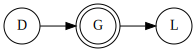

In [69]:
head_to_tail

In [70]:
tail_to_tail = graphviz.Digraph(graph_attr={'rankdir' : 'TB'}, node_attr={'shape':'circle'})
tail_to_tail.node('G')
tail_to_tail.node('S')
tail_to_tail.attr('node', shape='doublecircle')
tail_to_tail.node('I')
tail_to_tail.edges([('I','G'), ('I','S')])

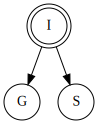

In [71]:
tail_to_tail

In [72]:
head_to_head = graphviz.Digraph(graph_attr={'rankdir' : 'TB'}, node_attr={'shape':'circle'})
head_to_head.node('I')
head_to_head.node('D')
head_to_head.attr('node', shape='doublecircle')
head_to_head.node('G')
head_to_head.edges([('I','G'), ('D','G')])

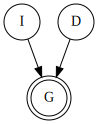

In [73]:
head_to_head

In the two first examples setting the value of the double circled node  breaks the connection between the other two variables and makes them conditionally independent. In the last example oposite happens: independent variables become dependent after fixing the value of double circle node.  

Those observation can be generalised by the notion of $d-separability":

"We wish to ascertain whether a particular conditional
independence statement $A\perp B | C$ is implied by a given directed acyclic graph. To
do so, we consider all possible paths from any node in A to any node in B. Any such
path is said to be blocked if it includes a node such that either

 1. the arrows on the path meet either head-to-tail or tail-to-tail at the node, and the
node is in the set C, or
 2. the arrows meet head-to-head at the node, and neither the node, nor any of its
descendants, is in the set C."

"If all paths are blocked, then A is said to be _d-separated_ from B by C, and the joint
distribution over all of the variables in the graph will satisfy $A\perp B | C$." 

Taken from "Pattern Recognition and Machine Learning" Ch. M. Bishop. 

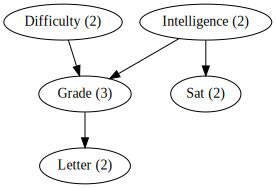

In [74]:
student_gr

In [75]:
student.local_independencies(['D', 'I', 'S', 'G', 'L'])

(D ⟂ S, I)
(I ⟂ D)
(S ⟂ G, L, D | I)
(G ⟂ S | I, D)
(L ⟂ S, I, D | G)

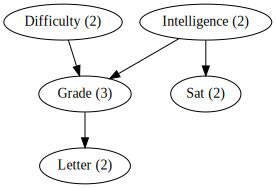

In [76]:
student_gr

In [77]:
student.get_independencies()

(D ⟂ S, I)
(D ⟂ I | S)
(D ⟂ S | I)
(D ⟂ L | G)
(D ⟂ L | S, G)
(D ⟂ S, L | I, G)
(D ⟂ S | I, L)
(D ⟂ L | S, I, G)
(D ⟂ S | I, G, L)
(G ⟂ S | I)
(G ⟂ S | I, L)
(G ⟂ S | I, D)
(G ⟂ S | I, L, D)
(I ⟂ D)
(I ⟂ D | S)
(I ⟂ L | G)
(I ⟂ L | S, G)
(I ⟂ L | G, D)
(I ⟂ L | S, G, D)
(S ⟂ D)
(S ⟂ G, L, D | I)
(S ⟂ L | G)
(S ⟂ L, D | I, G)
(S ⟂ G, D | I, L)
(S ⟂ G, L | I, D)
(S ⟂ L | G, D)
(S ⟂ D | I, G, L)
(S ⟂ L | I, G, D)
(S ⟂ G | I, L, D)
(L ⟂ S | I)
(L ⟂ S, I, D | G)
(L ⟂ I, D | S, G)
(L ⟂ S, D | I, G)
(L ⟂ S | I, D)
(L ⟂ S, I | G, D)
(L ⟂ D | S, I, G)
(L ⟂ I | S, G, D)
(L ⟂ S | I, G, D)